<a href="https://colab.research.google.com/github/BerkayArdaa/ML_HandwrittenDigits_Classification_CNN/blob/main/ML_Homework3_CNN_OR3_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# === MNIST CNN Homework - EEE 517 ===
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [3]:
# Loading MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train images shape :", X_train.shape)
print("Train labels shape :", y_train.shape)
print("Test images shape  :", X_test.shape)
print("Test labels shape  :", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train images shape : (60000, 28, 28)
Train labels shape : (60000,)
Test images shape  : (10000, 28, 28)
Test labels shape  : (10000,)


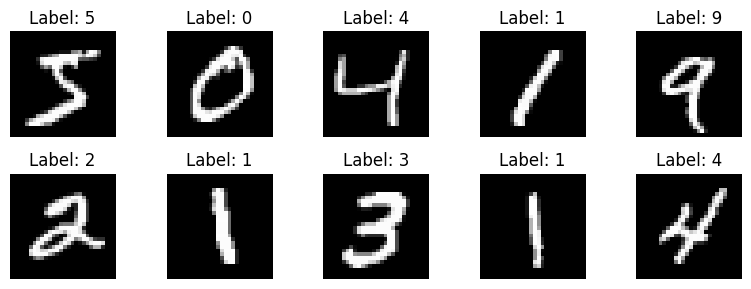

In [4]:
# Showing some sample images from the dataset

plt.figure(figsize=(8, 3))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [5]:
# Normalize pixel values to [0,1] and reshape for CNN

# Convert from (N, 28, 28) to (N, 28, 28, 1) and scale to [0,1]
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

print("New train shape:", X_train.shape)
print("New test shape :", X_test.shape)


New train shape: (60000, 28, 28, 1)
New test shape : (10000, 28, 28, 1)


In [6]:
# Create a small validation set from training data

from sklearn.model_selection import train_test_split

X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

print("Train subset shape:", X_train_sub.shape, y_train_sub.shape)
print("Validation shape  :", X_val.shape, y_val.shape)
print("Test shape        :", X_test.shape, y_test.shape)


Train subset shape: (54000, 28, 28, 1) (54000,)
Validation shape  : (6000, 28, 28, 1) (6000,)
Test shape        : (10000, 28, 28, 1) (10000,)


In [72]:
# === CNN Model Definition ===

tf.keras.backend.clear_session()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, Flatten,
    Dense, Dropout, BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
model_best = Sequential([
    Input(shape=(28,28,1)),

    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_best.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,586 (1.79 MB)

 Trainable params: 468,202 (1.79 MB)

 Non-trainable params: 384 (1.50 KB)

In [73]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)

model_best.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [74]:
# Learning rate düşürme
lr_sched = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-5,
    verbose=1
)
history_best = model_best.fit(
    X_train_sub, y_train_sub,
    epochs=15,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[lr_sched],
    verbose=1
)

print("Best Validation Accuracy:", max(history_best.history['val_accuracy']))

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8717 - loss: 0.4515 - val_accuracy: 0.9797 - val_loss: 0.0720 - learning_rate: 0.0010
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9754 - loss: 0.0882 - val_accuracy: 0.9840 - val_loss: 0.0584 - learning_rate: 0.0010
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9779 - loss: 0.0764 - val_accuracy: 0.9872 - val_loss: 0.0487 - learning_rate: 0.0010
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9841 - loss: 0.0561 - val_accuracy: 0.9887 - val_loss: 0.0487 - learning_rate: 0.0010
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9853 - loss: 0.0484 - val_accuracy: 0.9900 - val_loss: 0.0394 - learning_rate: 0.0010
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9874 - loss: 0.0458 - val_accuracy: 0.9908 - val_loss: 0.0424 - learning_rate: 0.0010
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9888 - 

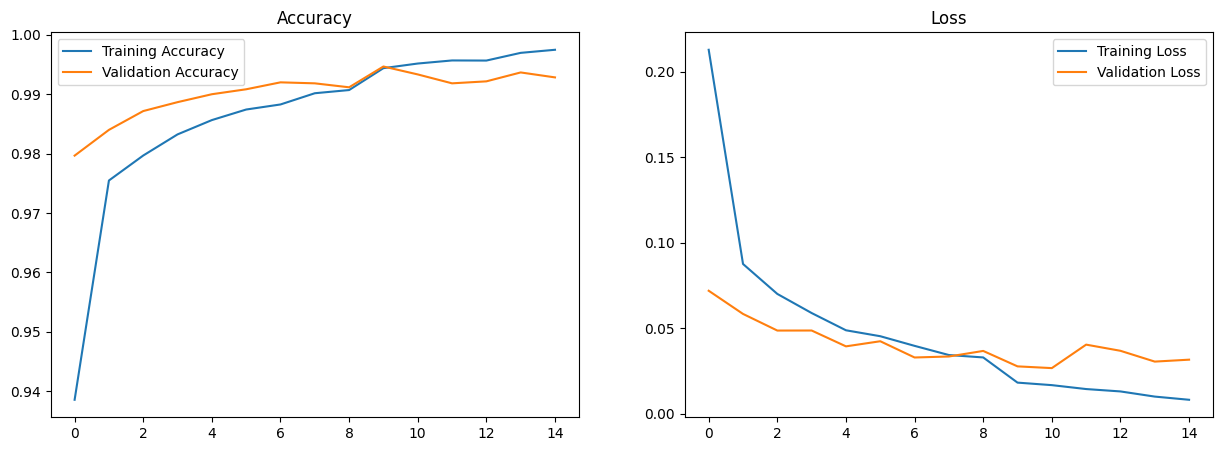

In [75]:
plt.figure(figsize=(15,5))

# ACCURACY
plt.subplot(1,2,1)
plt.plot(history_best.history['accuracy'], label="Training Accuracy")
plt.plot(history_best.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

# LOSS
plt.subplot(1,2,2)
plt.plot(history_best.history['loss'], label="Training Loss")
plt.plot(history_best.history['val_loss'], label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.show()


In [76]:
import os
print(os.listdir("VDataset"))


['deneme94.jpg', 'deneme91.jpg', 'deneme92.jpg', 'deneme93.jpg', 'deneme95.jpg', 'deneme7.jpg', 'deneme97.jpg', 'deneme8.jpg', 'six.jpg', 'six2.jpg', 'deneme96.jpg', 'deneme6.jpg', 'deneme9.jpg', '.ipynb_checkpoints']


In [77]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("VDataset/deneme96.jpg")

if img is None:
    print("FAILED to load image!")
else:
    print("Image loaded successfully!")




Image loaded successfully!


Image successfully loaded!


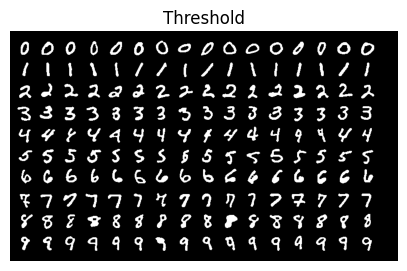


Detected digits: 108
Predicted digits in order:

3 5 4 2 7 8 6 3 7 2 4 0 8 5 7 2 5 3 9 6 0 8 7 3 5 9 8 4 2 2 2 4 0 6 2 4 3 5 0 6 9 6 7 2 0 1 8 4 3 2 2 6 8 1 0 5 9 2 6 3 2 0 4 3 8 6 9 5 0 5 4 6 2 8 3 2 8 2 0 5 4 6 7 0 8 2 5 6 9 8 5 2 0 3 7 3 4 1 2 6 3 2 0 7 9 5 4 6 



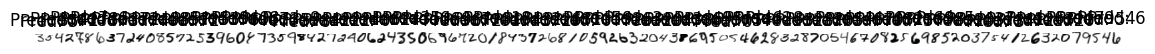

In [88]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# ======================================
# MNIST UYUMLU PREPROCESS FONKSİYONU
# ======================================
def prepare_digit(digit_raw):

    # 1) Invert (MNIST: beyaz digit, siyah arka plan)
    digit = cv2.bitwise_not(digit_raw)

    # 2) Threshold
    _, digit = cv2.threshold(digit, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 3) İç contour’u bul
    cnts, _ = cv2.findContours(digit.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(cnts) == 0:
        return None

    c = max(cnts, key=cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)
    digit = digit[y:y+h, x:x+w]

    # 4) MNIST standardı: max boyutu 20px olacak şekilde scale et
    h, w = digit.shape
    if w > h:
        factor = 20.0 / w
    else:
        factor = 20.0 / h

    digit = cv2.resize(digit, None, fx=factor, fy=factor)

    # 5) Pad to 28×28 (ortala)
    h, w = digit.shape
    pad_top    = (28 - h) // 2
    pad_bottom = 28 - h - pad_top
    pad_left   = (28 - w) // 2
    pad_right  = 28 - w - pad_left

    digit = np.pad(
        digit,
        ((pad_top, pad_bottom), (pad_left, pad_right)),
        "constant",
        constant_values=0
    )

    # 6) Normalize
    digit = digit.astype("float32") / 255.0

    # 7) CNN reshape
    digit = digit.reshape(1, 28, 28, 1)

    return digit


# ======================================
# FOTOĞRAFI OKU
# ======================================
img = cv2.imread("VDataset/deneme94.jpg")

if img is None:
    print("Image NOT loaded!")
else:
    print("Image successfully loaded!")

# 1) Resize → contour stabil olsun
scale = 800 / img.shape[1]
img = cv2.resize(img, None, fx=scale, fy=scale)

# 2) Grayscale + Blur
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (5,5), 0)

# 3) Adaptive Threshold
thresh = cv2.adaptiveThreshold(
    gray_blur, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    25, 10
)

# Morphology (ufak boşlukları kapat)
kernel = np.ones((3,3), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

# Show threshold
plt.figure(figsize=(5,5))
plt.imshow(thresh, cmap='gray')
plt.title("Threshold")
plt.axis("off")
plt.show()

# 4) Contours
contours, _ = cv2.findContours(
    thresh.copy(),
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

digits = []

# ======================================
# RAKAMLARI İŞLE
# ======================================
for c in contours:
    x, y, w, h = cv2.boundingRect(c)

    # çok küçük gürültüleri at
    if w < 20 or h < 20:
        continue

    digit_raw = gray[y:y+h, x:x+w]

    # MNIST preprocessing
    digit_ready = prepare_digit(digit_raw)
    if digit_ready is None:
        continue

    # Tahmin (model_opt kullandık!)
    pred = np.argmax(model_best.predict(digit_ready, verbose=0))

    digits.append((x, pred, digit_raw))

# ======================================
# SOLDAN SAĞA SIRALA
# ======================================
digits.sort(key=lambda d: d[0])

print("\nDetected digits:", len(digits))
print("Predicted digits in order:\n")

for _, p, _ in digits:
    print(p, end=" ")

print("\n")

# ======================================
# RAKAMLARI GÖSTER
# ======================================
plt.figure(figsize=(14, 3))
for i, (_, pred, roi) in enumerate(digits):
    plt.subplot(1, len(digits), i+1)
    plt.imshow(roi, cmap='gray')
    plt.title(f"Pred: {pred}")
    plt.axis("off")

plt.show()

Image successfully loaded!


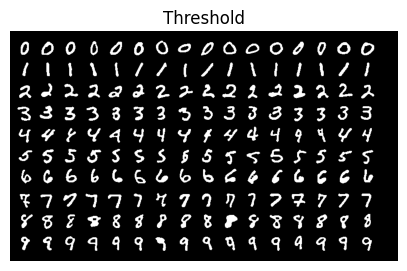


Predictions (ROW BY ROW):

0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
3 2 3 2 2 3 3 2 2 2 3 2 3 2 2 3 2 3 2 3 2 2 2 3 2 3 2
4 4 8 4 4 4 4 4 4 4 4 4
5 6 5 5 6 5 6 5 6 6 6 5 6 6 5 5 6 5 6 5 6 5 3 6 5 6
7 8 7 8 7 7 8 2 7 8 2 8 8 8 8 2 7 8 8 7 7
9 9 9 9 9 9 9


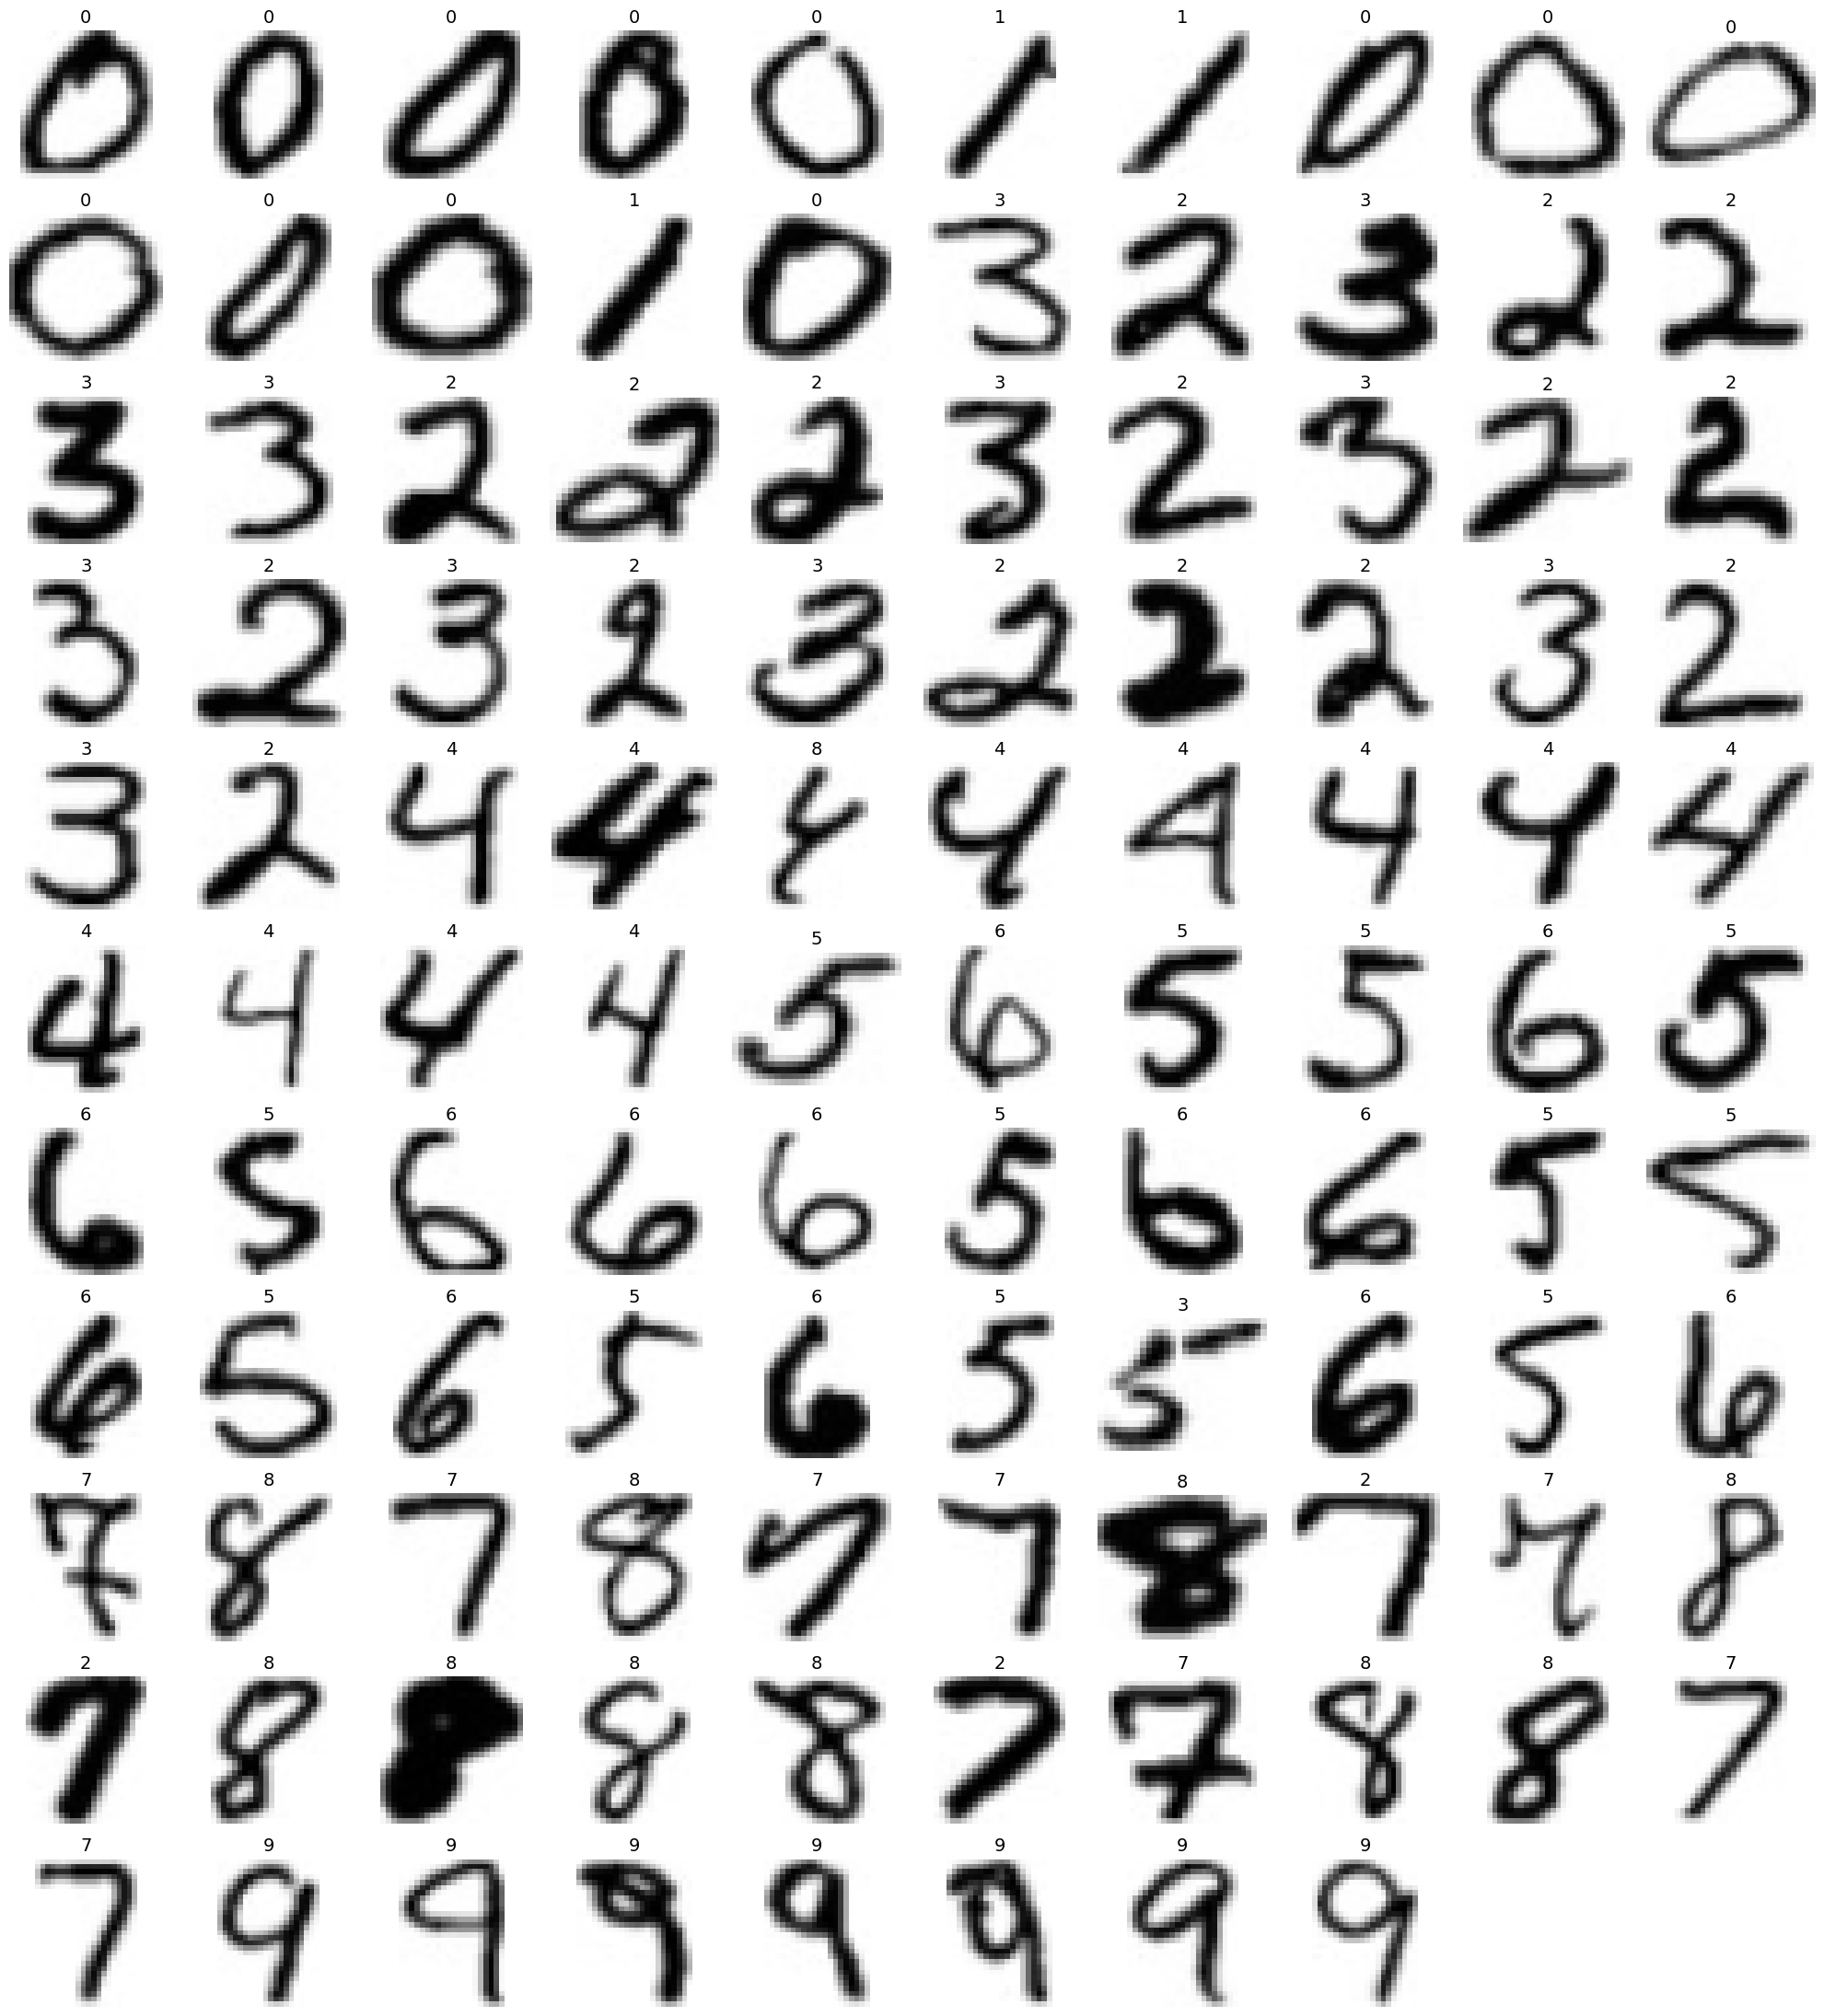

In [89]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# ======================================
# MNIST UYUMLU PREPROCESS FONKSİYONU
# ======================================
def prepare_digit(digit_raw):

    # Invert (MNIST format)
    digit = cv2.bitwise_not(digit_raw)

    # OTSU threshold
    _, digit = cv2.threshold(
        digit, 0, 255,
        cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )

    # İç contour bul
    cnts, _ = cv2.findContours(digit.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(cnts) == 0:
        return None

    c = max(cnts, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)
    digit = digit[y:y+h, x:x+w]

    # MNIST: en büyük kenar 20px olacak şekilde scale
    h, w = digit.shape
    factor = 20.0 / max(h, w)
    digit = cv2.resize(digit, None, fx=factor, fy=factor)

    # Pad to 28x28
    h, w = digit.shape
    pad_top = (28 - h) // 2
    pad_bottom = 28 - h - pad_top
    pad_left = (28 - w) // 2
    pad_right = 28 - w - pad_left

    digit = np.pad(
        digit,
        ((pad_top, pad_bottom), (pad_left, pad_right)),
        "constant",
        constant_values=0
    )

    # Normalize
    digit = digit.astype("float32") / 255.0

    # CNN reshape
    digit = digit.reshape(1, 28, 28, 1)
    return digit


# ======================================
# FOTOĞRAFI OKU
# ======================================
img_path = "VDataset/deneme94.jpg"   # ← BURAYI DEĞİŞTİR
img = cv2.imread(img_path)

if img is None:
    print("Image NOT loaded!")
    raise SystemExit

print("Image successfully loaded!")

# Resize
scale = 800 / img.shape[1]
img = cv2.resize(img, None, fx=scale, fy=scale)

# Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur
gray_blur = cv2.GaussianBlur(gray, (5,5), 0)

# Adaptive Threshold
thresh = cv2.adaptiveThreshold(
    gray_blur, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    25, 10
)

# Morph Close
kernel = np.ones((3,3), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

# Show threshold
plt.figure(figsize=(5,5))
plt.imshow(thresh, cmap='gray')
plt.title("Threshold")
plt.axis("off")
plt.show()


# ======================================
# CONTOUR BULMA
# ======================================
contours, _ = cv2.findContours(
    thresh.copy(),
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

digits_all = []

# ======================================
# HER RAKAMI İŞLE
# ======================================
for c in contours:
    x, y, w, h = cv2.boundingRect(c)

    # Gürültü filtrele
    if w < 20 or h < 20:
        continue

    digit_raw = gray[y:y+h, x:x+w]
    digit_ready = prepare_digit(digit_raw)
    if digit_ready is None:
        continue

    pred = np.argmax(model_best.predict(digit_ready, verbose=0))
    digits_all.append((x, y, pred, digit_raw))


# ======================================
# ROW-BY-ROW SATIR GRUPLAMA
# ======================================
rows = {}

for (x, y, pred, roi) in digits_all:
    row_key = y // 80        # satır yüksekliği (80 px)
    if row_key not in rows:
        rows[row_key] = []
    rows[row_key].append((x, pred, roi))

# Satırları yukarıdan aşağı sırala
sorted_rows = []
for rk in sorted(rows.keys()):
    row = sorted(rows[rk], key=lambda t: t[0])  # soldan sağa sırala
    sorted_rows.append(row)

# Tek liste haline getir
digits_final = [item for row in sorted_rows for item in row]


# ======================================
# SONUÇLARI YAZDIR (ROW BY ROW)
# ======================================
print("\nPredictions (ROW BY ROW):\n")
for row in sorted_rows:
    print(" ".join(str(p) for (x, p, roi) in row))


# ======================================
# GRID ŞEKLİNDE GÖSTER
# ======================================
import math

N = len(digits_final)
cols = 10
rows_n = math.ceil(N / cols)

plt.figure(figsize=(20, rows_n * 2))

for i, (x, pred, roi) in enumerate(digits_final):
    plt.subplot(rows_n, cols, i+1)
    plt.imshow(roi, cmap='gray')
    plt.title(str(pred), fontsize=14)
    plt.axis("off")

plt.tight_layout()
plt.show()
